Recognising HandWritten Digits On MNIST Dataset using KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/ACER/OneDrive/Python/projects/Data/mnist_train.csv')

In [5]:
print(df.shape)

(59999, 785)


In [8]:
print(df.columns)

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)


In [9]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = df.values

In [11]:
print(data.shape)

(59999, 785)


In [12]:
print(type(data))

<class 'numpy.ndarray'>


In [13]:
x = data[:,1:]
y=  data[:,0]

In [15]:
print(x.shape,y.shape)

(59999, 784) (59999,)


In [16]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
print(y)

[0 4 1 ... 5 6 8]


In [18]:
#train test split
split = int(0.8* x.shape[0])

In [19]:
split

47999

In [20]:
x_train = x[:split,: ]
y_train = y[:split]

In [21]:
x_test = x[split,:]
y_test = y[split:]

In [22]:
print(x_train.shape,y_train.shape)

(47999, 784) (47999,)


In [23]:
print(x_test.shape, y_test.shape)

(784,) (12000,)


In [24]:
#visiualise some samples

In [33]:
def drawImage(sample):

    #reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

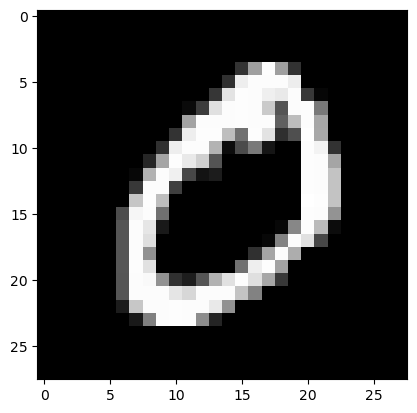

In [34]:
drawImage(x_train[0])

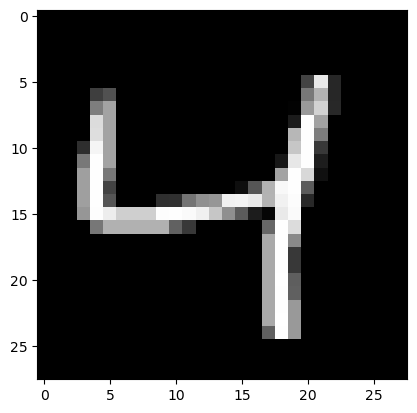

In [35]:
drawImage(x_train[1])

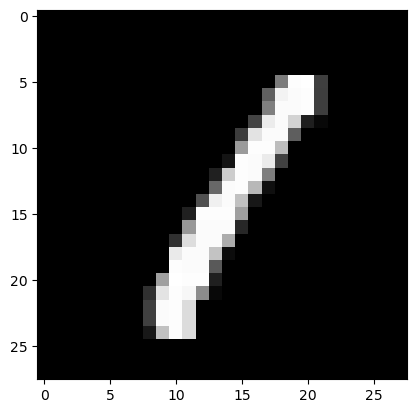

In [36]:
drawImage(x_train[2])

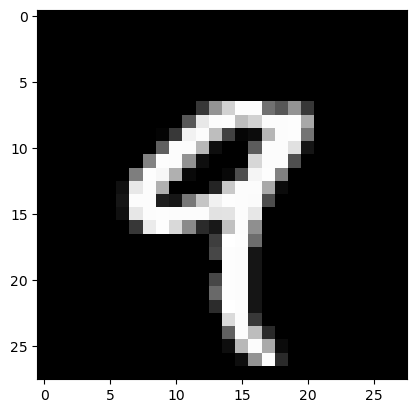

In [37]:
drawImage(x_train[3])

In [38]:
drawImage(y_train[0])


ValueError: cannot reshape array of size 1 into shape (28,28)

In [39]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

#KNN Algo

def knn(x,y,querypoint,k=5):
    vals=[]
    #for every point in the x
    for i in range(x.shape[0]):

        #compute distance
        d=distance(querypoint,x[i])
        vals.append((d,y[i]))
    # print(vals)
    #step 2:- sort the array and find k nearest points
    vals=sorted(vals)
    vals=vals[:k]
    #Majority vote
    vals = np.array(vals)
    new_values = np.unique(vals[:,1],return_counts=True)
    print(new_values)
    #index of the maximum count
    index = new_values[1].argmax()
    #map this index with my data
    pred = new_values[0][index]
    return pred


In [45]:
#make prediction over test images

pred = knn(x_train,y_train,x_test[26])

(array([1.]), array([5], dtype=int64))


In [46]:
pred

1.0